# NLP with KNN and SVC

**Intro**
* In this notebook we examine movie reviews from the v2.0 polarity dataset at
http://www.cs.cornell.edu/people/pabo/movie-review-data.
* It contains text reviews of movies divided into two categories: positive and negative.
* You may find the turtorial "Working With Text Data" helpfu - http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* If you have downloaded the scikit-learn source code:
    * The data can be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * Possibly helpful: doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * The code in this document borrows heavily from doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py

In [1]:
import matplotlib.pylab as py

In [2]:
# Essentially doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py w/ minor edits
"""Build a sentiment analysis / polarity model

Sentiment analysis can be cast as a binary text classification problem.
that is fitting a linear classifier on features extracted from the text
so as to classify the opinion of the author as positive or negative.

In this examples we will train on a movie review dataset.
"""

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# NOTE: we put the following in a 'if __name__ == "__main__"' protected
# block to be able to use a multi-core grid search that also works under
# Windows, see: http://docs.python.org/library/multiprocessing.html#windows
# The multiprocessing module is used as the backend of joblib.Parallel
# that is used when n_jobs != 1 in GridSearchCV

# the training data folder must be passed as the first argument
movie_reviews_data_folder = 'txt_sentoken'
print("loading files...")
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

# split the dataset into training and test sets:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    # Note: integer values of min/max_df are absolute counts, while 
    #       float values are percentages. That's why max (as a float)
    #       can be smaller than min (as an integer)
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000, max_iter=9000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
print("entering grid search")
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

# TASK: print the cross-validated scores for each parameter set
# explored by the grid search
print("grid search results:")
print(grid_search.cv_results_)

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print("classification report:")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print('confusion matrix: ')
print(cm)

# import matplotlib.pyplot as plt
# plt.matshow(cm)
# plt.show()

# Study: scikit-learn TfidVectorizer class

**Documentation for the TfidVectorizer class:   
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Term frequency–inverse document frequency (TF-IDF) statistic: http://en.wikipedia.org/wiki/Tf%E2%80%93idf
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.
* Explore the ngram_range parameter of TfidVectorizer.  (Note, large values of ngram_range may require a long run time)

In [9]:
# Use the TfidVectorizer class to create features for the text documents
features = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,1))
X=features.fit_transform(docs_train)

In [10]:
print('Number of features: ', len(features.get_feature_names()))

16116

In [11]:
# Allow TfidVectorizer class to incorporate 2-grams.
features = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,2))
X=features.fit_transform(docs_train)

In [12]:
print('Number of features: ',len(features.get_feature_names()))

Number of features:  64315


In [17]:
# View some features
features.get_feature_names()[200:210]

['2020',
 '2029',
 '20th',
 '20th anniversary',
 '20th century',
 '21',
 '21 1997',
 '21 years',
 '2176',
 '21st']

# Incorporate ML algorithms: SVC, KNN


* TfidfVectorizer usage
    * "fit" TfidfVectorizer using docs_train
    * "Xtrain" will be a Tf-idf-weighted document-term matrix corresponding to docs_train 
    * "Xtest" will be a Tf-idf-weighted document-term matrix corresponding to docs_test
    * Note: use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_train and docs_test
* Incorporate the classifiers LinearSVC and KNeighborsClassifier 
    * Explore parameter settings for each, using a confusion matrix to measure performance.
* Examine examples with incorrect predictions - why might the classifier have missed these?

In [18]:
features = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,1))
features.fit(docs_train)
Xtrain = features.transform(docs_train)
Xtest = features.transform(docs_test)

In [19]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# Choose one classifier.
# SVC seems to give better results
classifier = LinearSVC(C=1)
#classifier = KNeighborsClassifier(n_neighbors=4,weights='distance',p=2)

# Fit classifier and make predictions
classifier.fit(Xtrain,y_train)
y_predicted = classifier.predict(Xtest)

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print('confusion matrix:')
print(cm)

confusion matrix:
[[219  38]
 [ 41 227]]


In [ ]:
# Compare y_test and y_predicted
y_test

In [ ]:
y_predicted

In [51]:
# Print and plot the confusion matrix classifier = KNeighborsClassifier(n_neighbors=4,weights='distance',p=2)
cm = metrics.confusion_matrix(y_test, y_predicted)
print('confusion matrix:')
print(cm)

confusion matrix:
[[162  95]
 [ 77 191]]


In [23]:
import matplotlib.pylab as py

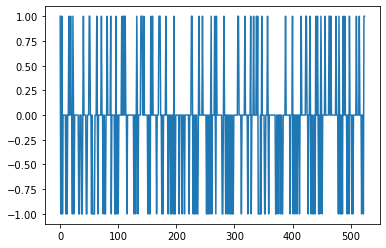

In [43]:
# Ideally this would be all zeros, i.e. no color in the graph
py.plot(y_test-y_predicted)

In [72]:
import numpy as np

In [ ]:
# Example where y_test=1 (is positive), but y_predicted=0 (is negative) 
print(np.array(docs_test)[ y_test-y_predicted == 1][0].decode())

In [ ]:
# y_test=0 (is negative), but y_predicted=1 (is positive) 
print(np.array(docs_test)[ y_test-y_predicted == -1][0].decode())

# For fun - Open ended question:  Finding the right plot

* Can you find a two dimensional plot separating the positive and negative reviews?
    * This problem is hard since you likely have thousands of features, and you must transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Below are two examples.
    * The first plots the length of the review versus the number of features we compute that are in that review
    * The second uses PCA on a subset of the features.

In [27]:
x = np.array(list(map(len,docs_train)))
y = np.sum(Xtrain.toarray(),axis=1)

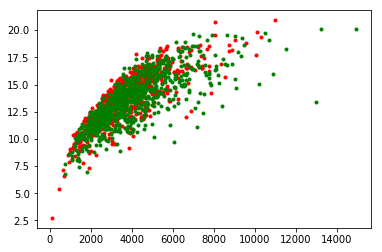

In [28]:
py.plot(x[y_train==0],y[y_train==0],'r.')
py.plot(x[y_train==1],y[y_train==1],'g.')

In [29]:
from sklearn.decomposition import PCA

In [30]:
# Note, capping the maximum number of features at 100 is very important.  If you try to run PCA
# on too many features then it may take a **long** time to run, or perhaps even run your machine 
# out of memory.
features = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,1),max_features=100)
features.fit(docs_train)
Xtrain = features.transform(docs_train)
Xtest = features.transform(docs_test)

In [31]:
dimensionReducer = PCA(n_components=2)
Xhat = dimensionReducer.fit_transform(Xtrain.toarray())
Xhat.shape

(1500, 2)

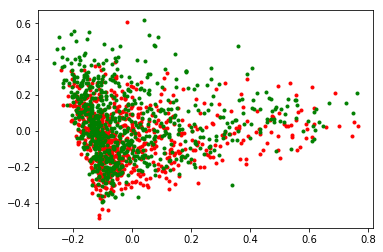

In [32]:
py.plot(Xhat[y_train==0,0],Xhat[y_train==0,1],'r.')
py.plot(Xhat[y_train==1,0],Xhat[y_train==1,1],'g.')

In [75]:
map(len,docs_train)